In [1]:
import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()

'D:\\Spark\\spark-3.1.3-bin-hadoop2.7'

# Thư viện sử dụng. Import dữ liệu

In [2]:
#STEP 0 : Import và nhập dữ liệu 
import time
# Basic libs
import numpy as np
# from scipy.signal import find_peaks
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import builtins
import matplotlib.ticker as mtick

# Sklearn 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

#Vector libs
from pyspark.ml.feature import VectorAssembler


# model libs   
# from pyspark.ml import Pipeline
# from pyspark.ml import PipelineModel



from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.classification import GBTClassificationModel

# Evaluation
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# SQL function libs
from pyspark.sql import functions as F
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, DoubleType


spark = SparkSession.builder.appName("GBT").getOrCreate()
file_path = 'sample_data.csv'


schema = StructType() \
.add("v_int_times", DoubleType(),True							)\
.add("v_int_duration",DoubleType(),True                          )\
.add("v_usage_day",DoubleType(),True                )\
.add("t_usage_ic_day",DoubleType(),True                           )\
.add("register_days",DoubleType(),True                        )\
.add("t_call_duration",DoubleType(),True              )\
.add("re_charge_day",DoubleType(),True                  )\
.add("v_duration",DoubleType(),True              )\
.add("balance_basic_bod",DoubleType(),True                  )\
.add("t_charge_day",DoubleType(),True        )\
.add("t_usage_day",DoubleType(),True            )\
.add("t_num_times",DoubleType(),True        )\
.add("g_reg_fee",DoubleType(),True        )\
.add("v_times",DoubleType(),True       )\
.add("t_num_ic_times",DoubleType(),True                         )\
.add("v_times_ic",DoubleType(),True               )\
.add("v_int_times_ic",DoubleType(),True                   )\
.add("v_duration_ic",DoubleType(),True               )\
.add("t_org_charge",DoubleType(),True               )\
.add("stddev_v_duration",DoubleType(),True               )\
.add("t_tot_charge_over_stddev_3m",DoubleType(),True               )\
.add("is_3k3d",DoubleType(),True              )\
.add("t_tot_charge",DoubleType(),True                         )\
.add("churn",DoubleType(),True                  )\
.add("delta_t_tot_ch",DoubleType(),True                         )\
.add("stddev_t_org_charge",DoubleType(),True                         )\
    # .add("v_duration_test",DoubleType(),True              )\
    
df = spark.read.option("header", True).schema(schema).csv(file_path)

display(df)
df.printSchema()
df.limit(10).toPandas()

DataFrame[v_int_times: double, v_int_duration: double, v_usage_day: double, t_usage_ic_day: double, register_days: double, t_call_duration: double, re_charge_day: double, v_duration: double, balance_basic_bod: double, t_charge_day: double, t_usage_day: double, t_num_times: double, g_reg_fee: double, v_times: double, t_num_ic_times: double, v_times_ic: double, v_int_times_ic: double, v_duration_ic: double, t_org_charge: double, stddev_v_duration: double, t_tot_charge_over_stddev_3m: double, is_3k3d: double, t_tot_charge: double, churn: double, delta_t_tot_ch: double, stddev_t_org_charge: double]

root
 |-- v_int_times: double (nullable = true)
 |-- v_int_duration: double (nullable = true)
 |-- v_usage_day: double (nullable = true)
 |-- t_usage_ic_day: double (nullable = true)
 |-- register_days: double (nullable = true)
 |-- t_call_duration: double (nullable = true)
 |-- re_charge_day: double (nullable = true)
 |-- v_duration: double (nullable = true)
 |-- balance_basic_bod: double (nullable = true)
 |-- t_charge_day: double (nullable = true)
 |-- t_usage_day: double (nullable = true)
 |-- t_num_times: double (nullable = true)
 |-- g_reg_fee: double (nullable = true)
 |-- v_times: double (nullable = true)
 |-- t_num_ic_times: double (nullable = true)
 |-- v_times_ic: double (nullable = true)
 |-- v_int_times_ic: double (nullable = true)
 |-- v_duration_ic: double (nullable = true)
 |-- t_org_charge: double (nullable = true)
 |-- stddev_v_duration: double (nullable = true)
 |-- t_tot_charge_over_stddev_3m: double (nullable = true)
 |-- is_3k3d: double (nullable = true)
 |-- t_to

,v_int_times,v_int_duration,v_usage_day,t_usage_ic_day,register_days,t_call_duration,re_charge_day,v_duration,balance_basic_bod,t_charge_day,...,v_int_times_ic,v_duration_ic,t_org_charge,stddev_v_duration,t_tot_charge_over_stddev_3m,is_3k3d,t_tot_charge,churn,delta_t_tot_ch,stddev_t_org_charge
0,4.0,8.0,24.0,40.0,3.0,3.0,0.0,0.0,0.0,3.0,...,1.0,0.0,44.0,0.21,0.19,1.0,1.810000e+07,1.0,0.0,0.027027
1,4.0,8.0,24.0,40.0,3.0,3.0,0.0,0.0,0.0,3.0,...,1.0,0.0,44.0,0.21,0.19,0.0,1.810000e+07,1.0,0.0,0.000000
2,4.0,8.0,24.0,40.0,3.0,3.0,0.0,0.0,0.0,3.0,...,1.0,0.0,44.0,0.21,0.19,0.0,1.810000e+07,1.0,0.0,0.000000
3,2.0,6.0,16.0,120.0,0.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,68.0,0.11,0.30,1.0,4.340000e+07,1.0,2.0,0.081081
4,2.0,6.0,16.0,120.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,24.0,0.05,0.11,1.0,7.480000e+07,1.0,1.0,0.054054
5,2.0,6.0,16.0,120.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,48.0,0.05,0.21,0.0,3.990000e+07,1.0,1.0,0.027027
6,4.0,6.0,24.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.05,0.04,0.0,1.840000e+09,1.0,0.0,0.000000
7,2.0,6.0,16.0,120.0,0.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,93.0,0.11,0.41,1.0,1.230000e+08,1.0,2.0,0.081081
8,4.0,6.0,24.0,96.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,872.0,0.16,3.84,0.0,3.587000e+03,1.0,1.0,0.027027
9,2.0,6.0,16.0,120.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,8.0,0.05,0.04,1.0,6.260000e+07,1.0,1.0,0.054054


Thêm cột id

In [3]:
#step 3  create  id  
from pyspark.sql import Window
from pyspark.sql.functions import rank, min
from pyspark.sql.functions import desc
# window = Window.partitionBy("sort").orderBy("duration") 

##### Tạo trường id theo row number của cột duration :
df1 = df.withColumn("id", F.row_number().over(Window.orderBy("t_tot_charge")))
display (df1)
# df = df.withColumn("id", rank().over(window))
# df1.columns


DataFrame[v_int_times: double, v_int_duration: double, v_usage_day: double, t_usage_ic_day: double, register_days: double, t_call_duration: double, re_charge_day: double, v_duration: double, balance_basic_bod: double, t_charge_day: double, t_usage_day: double, t_num_times: double, g_reg_fee: double, v_times: double, t_num_ic_times: double, v_times_ic: double, v_int_times_ic: double, v_duration_ic: double, t_org_charge: double, stddev_v_duration: double, t_tot_charge_over_stddev_3m: double, is_3k3d: double, t_tot_charge: double, churn: double, delta_t_tot_ch: double, stddev_t_org_charge: double, id: int]

In [4]:
# Khai phá dữ liệu

In [5]:
# Step 4: Thống kê về dữ liệu 

df.agg({'t_tot_charge': 'max'}).show()
# df_buck.agg({'duration': 'min'}).show()
 

stats = df.selectExpr("min(t_tot_charge)", "max(t_tot_charge)", "mean(t_tot_charge)",
                                           "percentile(t_usage_ic_day, 0.5)", "variance(t_tot_charge)",
                                           "stddev(t_tot_charge)")
stats.show()  

+-----------------+
|max(t_tot_charge)|
+-----------------+
|          4.98E11|
+-----------------+

+-----------------+-----------------+------------------+--------------------------------------------------+----------------------+--------------------+
|min(t_tot_charge)|max(t_tot_charge)|mean(t_tot_charge)|percentile(t_usage_ic_day, CAST(0.5 AS DOUBLE), 1)|variance(t_tot_charge)|stddev(t_tot_charge)|
+-----------------+-----------------+------------------+--------------------------------------------------+----------------------+--------------------+
|              0.0|          4.98E11|  5.302765968099E9|                                              80.0|  7.594967897377338E20|2.755896931559186E10|
+-----------------+-----------------+------------------+--------------------------------------------------+----------------------+--------------------+



Muốn thưc hiện các truy vấn sql để khảo sát dữ liệu thì phải tạo bảng tạm \
`df1` đang ở dạng pyspark dataframe, thì mình phải chuyển sang dạng bảng tạm để truy vấn sql 

In [6]:
df1.createOrReplaceTempView ("df_sql")

In [7]:
spark.sql("select churn,  count ( * ) from df_sql group by churn ;").show()

+-----+--------+
|churn|count(1)|
+-----+--------+
|  0.0|    6782|
|  1.0|    3218|
+-----+--------+



## Thống kê tổng tiêu dùng

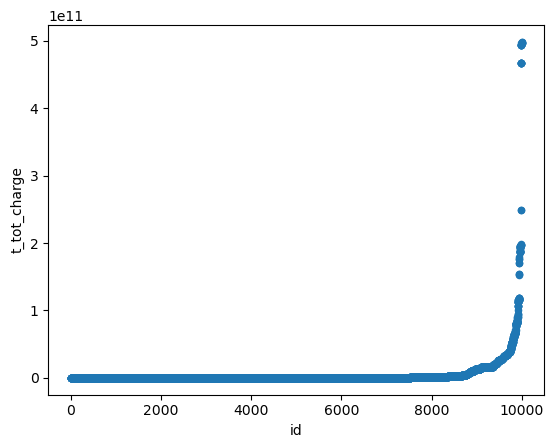

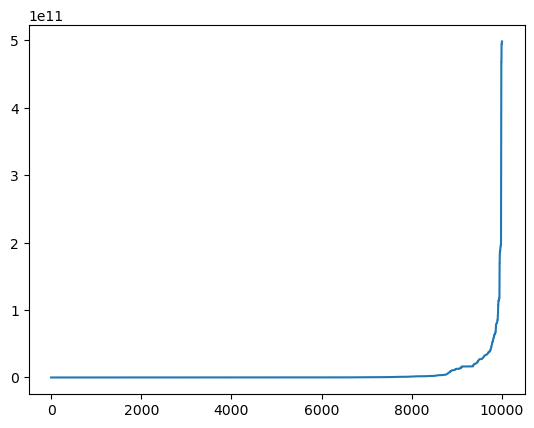

In [8]:
df_pandas = df1.toPandas()
ax2 = df_pandas.plot.scatter(x='id',
                      y='t_tot_charge',
                      colormap='viridis')

fix, ax1 = plt.subplots() 
ax1.plot(df_pandas["id"], df_pandas["t_tot_charge"])
plt.show()   

Độ tương quan giữa các feature so với nhãn

<AxesSubplot:>

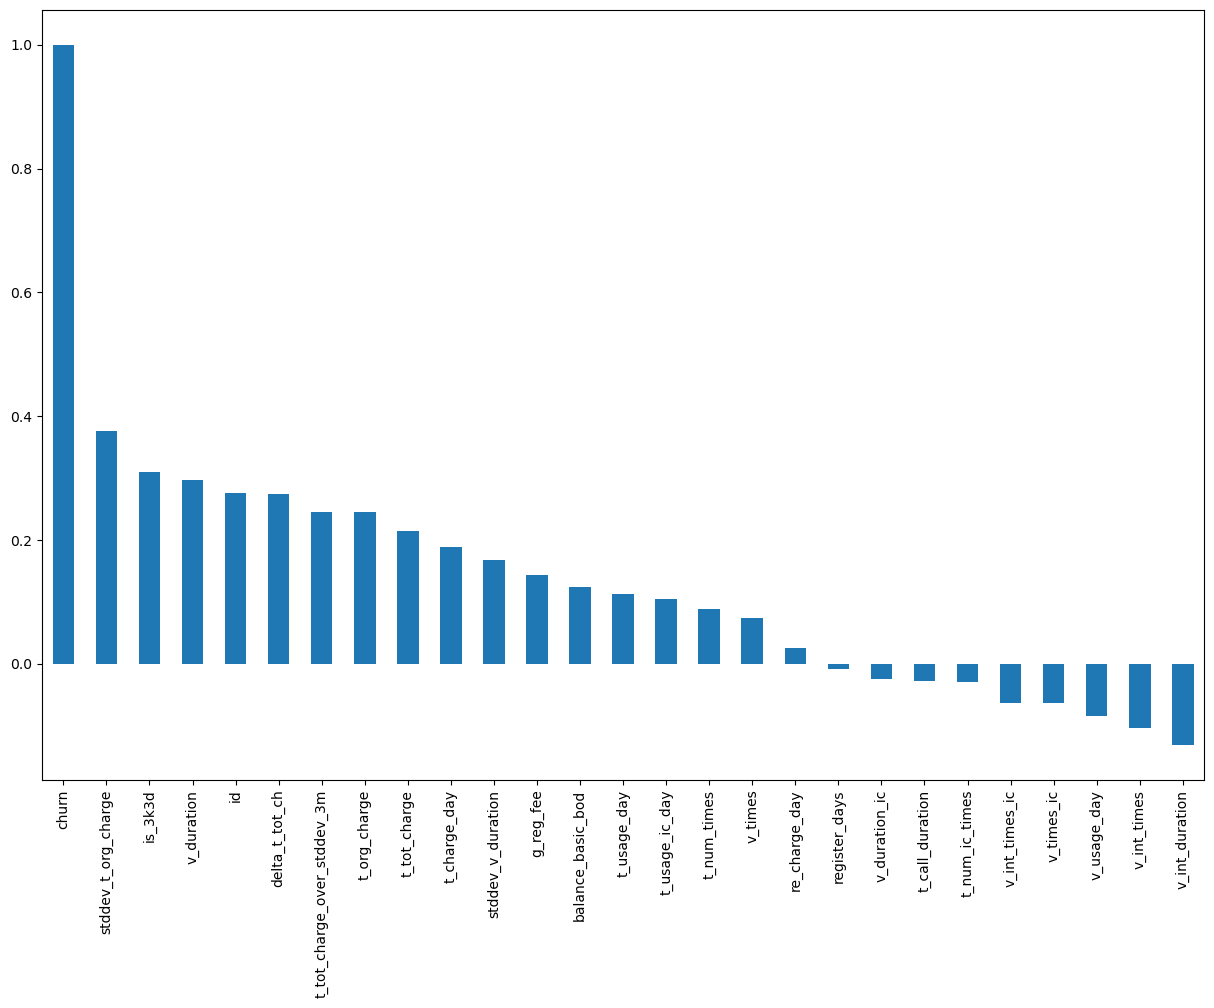

In [9]:
plt.figure(figsize=(15,10))
# df_pandas.corr(method ='pearson')['churn'].sort_values(ascending = False)
df_pandas.corr(method ='pearson')['churn'].sort_values(ascending = False).plot(kind='bar')

Thống kê số lượng thuê bao 3k3d

Text(0.5, 1.0, '% of 3k3d')

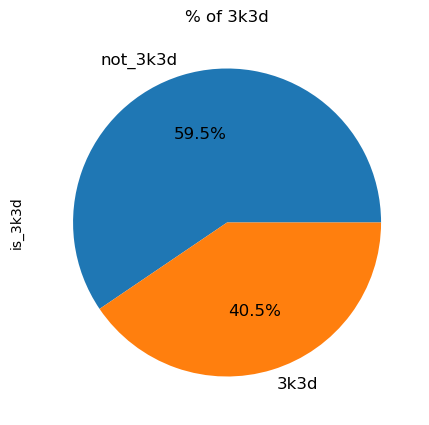

In [10]:

# Chỉnh lại đoạn này
ax = (df_pandas['is_3k3d'].value_counts()*100.0 /len(df_pandas))\
.plot.pie(autopct='%.1f%%', labels = ['not_3k3d', '3k3d'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.set_ylabel('i',fontsize = 12)
ax.set_title('% of 3k3d', fontsize = 12)

# Chia tập train, test

In [11]:
splits = df1.randomSplit([0.8, 0.2], 2001 )
train = splits[0]
test = splits[1]


print(train.count())
print(test.count())

print(len(train.columns))
print(len(test.columns))

8012
1988
27
27


Kiểm tra số lượng thuê bao ở mỗi tập

In [12]:
print ( "train")
m1= train.groupby('churn').count()
m1.show()
print(m1.collect())
m1_tong = (m1.collect()[0][1] + m1.collect()[1][1])
print(m1_tong)


print( "test")
m2= test.groupby('churn').count()
m2.show()
print(m2.collect())
m2_tong = (m2.collect()[0][1] + m2.collect()[1][1])
print(m2_tong)

print ("bảng tổng hợp ")
x= pd.DataFrame([[m1.collect()[0][1] ,m1.collect()[0][1]/m1_tong*100 , m1.collect()[1][1] , m1.collect()[1][1]/m1_tong*100,m1_tong]\
,[m2.collect()[0][1] ,m2.collect()[0][1]/m2_tong*100 , m2.collect()[1][1] , m2.collect()[1][1]/m2_tong*100,m2_tong]\
],columns=['sltb_0','tyle_0','sltb_1','tyle_1','tong'], index =['train','test'])
print(x)
x = spark.createDataFrame(x)
x.show()

train
+-----+-----+
|churn|count|
+-----+-----+
|  0.0| 5413|
|  1.0| 2599|
+-----+-----+

[Row(churn=0.0, count=5413), Row(churn=1.0, count=2599)]
8012
test
+-----+-----+
|churn|count|
+-----+-----+
|  1.0|  619|
|  0.0| 1369|
+-----+-----+

[Row(churn=1.0, count=619), Row(churn=0.0, count=1369)]
1988
bảng tổng hợp 
       sltb_0     tyle_0  sltb_1     tyle_1  tong
train    5413  67.561158    2599  32.438842  8012
test      619  31.136821    1369  68.863179  1988
+------+------------------+------+-----------------+----+
|sltb_0|            tyle_0|sltb_1|           tyle_1|tong|
+------+------------------+------+-----------------+----+
|  5413| 67.56115826260609|  2599|32.43884173739391|8012|
|   619|31.136820925553323|  1369|68.86317907444668|1988|
+------+------------------+------+-----------------+----+



In [13]:
# step 10 take feature cols
print(type(train.columns))

x = [train, test]


train_m  =  x[0]
test_m   = x[1]

# # chỉ lấy các cột feature để biến đổi sau đó gán vào biến number_cols để bước sau biến đổi vectors 
number_cols = [ x for x in train_m.columns if x not in ['id', 'churn'] ]

print(len(number_cols))

<class 'list'>
25


## Fill vào các giá trị null

In [14]:
# Bước 11 fill null , double 
from pyspark.sql.functions import col

def cast_all(input_df):
    return input_df.select([col(col_name).cast("Double") for col_name in input_df.columns])

train_m = cast_all(train_m)
test_m = cast_all(test_m)

df_train_fillna = train_m.fillna(-1, subset = number_cols )  
df_test_fillna = test_m.fillna(-1, subset = number_cols )        

df_train_fillna.printSchema()
df_test_fillna.printSchema()


root
 |-- v_int_times: double (nullable = false)
 |-- v_int_duration: double (nullable = false)
 |-- v_usage_day: double (nullable = false)
 |-- t_usage_ic_day: double (nullable = false)
 |-- register_days: double (nullable = false)
 |-- t_call_duration: double (nullable = false)
 |-- re_charge_day: double (nullable = false)
 |-- v_duration: double (nullable = false)
 |-- balance_basic_bod: double (nullable = false)
 |-- t_charge_day: double (nullable = false)
 |-- t_usage_day: double (nullable = false)
 |-- t_num_times: double (nullable = false)
 |-- g_reg_fee: double (nullable = false)
 |-- v_times: double (nullable = false)
 |-- t_num_ic_times: double (nullable = false)
 |-- v_times_ic: double (nullable = false)
 |-- v_int_times_ic: double (nullable = false)
 |-- v_duration_ic: double (nullable = false)
 |-- t_org_charge: double (nullable = false)
 |-- stddev_v_duration: double (nullable = false)
 |-- t_tot_charge_over_stddev_3m: double (nullable = false)
 |-- is_3k3d: double (nulla

`assembler` sẽ tạo ra một đối tượng `VectorAssembler` để kết hợp các cột đầu vào trong `vector_feature_columns` thành một vector đặc trưng mới, và đặt tên cho cột đầu ra là `features_m`.

In [15]:
# step 12 : transform vector
class_col = 'churn'
class_name = ['model_spark']
primary_keys = [ 'id']
 
#
 
vector_feature_columns = number_cols
assembler = VectorAssembler(inputCols = vector_feature_columns , outputCol='features_m')
 
# m
train_df_transformed = assembler.transform(df_train_fillna)  # chạy lệnh tạo vecto
test_df_transformed = assembler.transform(df_test_fillna)  # chạy lệnh tạo vecto
 
print(train_df_transformed)  
print(test_df_transformed)  
 

DataFrame[v_int_times: double, v_int_duration: double, v_usage_day: double, t_usage_ic_day: double, register_days: double, t_call_duration: double, re_charge_day: double, v_duration: double, balance_basic_bod: double, t_charge_day: double, t_usage_day: double, t_num_times: double, g_reg_fee: double, v_times: double, t_num_ic_times: double, v_times_ic: double, v_int_times_ic: double, v_duration_ic: double, t_org_charge: double, stddev_v_duration: double, t_tot_charge_over_stddev_3m: double, is_3k3d: double, t_tot_charge: double, churn: double, delta_t_tot_ch: double, stddev_t_org_charge: double, id: double, features_m: vector]
DataFrame[v_int_times: double, v_int_duration: double, v_usage_day: double, t_usage_ic_day: double, register_days: double, t_call_duration: double, re_charge_day: double, v_duration: double, balance_basic_bod: double, t_charge_day: double, t_usage_day: double, t_num_times: double, g_reg_fee: double, v_times: double, t_num_ic_times: double, v_times_ic: double, v_in

In [16]:
#Bước 13 lựa chọn để đưa vào mô hình
train_m = train_df_transformed.select('id', 'features_m', class_col)   
 
test_m = test_df_transformed.select('id', 'features_m', class_col)   
# test_m.columns
train_m.columns 

['id', 'features_m', 'churn']

# GBT

In [17]:
import IPython
print(IPython.sys_info())

{'commit_hash': 'e321e760a',
 'commit_source': 'installation',
 'default_encoding': 'utf-8',
 'ipython_path': 'D:\\anaconda3\\Lib\\site-packages\\IPython',
 'ipython_version': '7.31.1',
 'os_name': 'nt',
 'platform': 'Windows-10-10.0.19045-SP0',
 'sys_executable': 'd:\\anaconda3\\python.exe',
 'sys_platform': 'win32',
 'sys_version': '3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit '
                '(AMD64)]'}


In [18]:
# %pyspark

gbt = GBTClassifier (
    featuresCol="features_m"
    , labelCol="churn"
    , predictionCol="predictionCol"
    , maxDepth=5
    , maxBins=32
    , minInstancesPerNode=1
    , minInfoGain=0.0
    , maxMemoryInMB=256
    , cacheNodeIds= True     #False
    , checkpointInterval=10
    , lossType="logistic"
    , maxIter=20
    , stepSize=0.1
    , seed= 961928988
    , subsamplingRate=1.0)

- featuresCol: tên của cột chứa vector đặc trưng đầu vào.
- labelCol: tên của cột chứa nhãn đầu ra.
- predictionCol: tên của cột chứa kết quả dự đoán cuối cùng.
- maxDepth: độ sâu tối đa của cây quyết định.
- maxBins: số lượng bin tối đa được sử dụng khi tạo histogram cho các đặc trưng số.
- minInstancesPerNode: số lượng điểm dữ liệu tối thiểu cần có trong mỗi nút lá của cây.
- minInfoGain: giá trị tối thiểu của thông tin tăng cần đạt được để chia một nút.
- maxMemoryInMB: dung lượng bộ nhớ tối đa được sử dụng cho quá trình huấn luyện.
- cacheNodeIds: sử dụng bộ nhớ cache để lưu trữ ID của các nút cây trong quá trình huấn luyện.
- checkpointInterval: số lượng epoch trước khi lưu trạng thái của mô hình vào bộ nhớ đệm.
- lossType: hàm mất mát được sử dụng trong quá trình huấn luyện (logistic, squared, absolute).
- maxIter: số lượng epoch tối đa để huấn luyện mô hình.
- stepSize: kích thước bước tối ưu hóa trong quá trình huấn luyện.
- seed: giá trị giống ngẫu nhiên được sử dụng để tạo các số ngẫu nhiên trong quá trình huấn luyện.
- subsamplingRate: tỉ lệ mẫu được sử dụng để huấn luyện mỗi cây trong rừng (giá trị từ 0 đến 1).

### Chạy model 

In [19]:
# Bước 15 : chạy model 
model_m = gbt.fit(train_m)

Save và load model

In [20]:

basePath = "D:/HUST/20222/Code_DATN/models"
model_m.write().overwrite().save(basePath + "/model_gbt") 
#load model 
model_m = GBTClassificationModel.load("D:/HUST/20222/Code_DATN/models/model_gbt")

## Đánh giá model

### ROC

In [21]:
evaluator_roc = BinaryClassificationEvaluator(rawPredictionCol='predictionCol'.format(class_name[0]), labelCol=class_col, metricName="areaUnderROC")

In [22]:
# Bước 16   ĐÁNH GIÁ MODEL BẰNG ROC 
train_pred_m   = model_m.transform(train_m)

train_roc_m = evaluator_roc.evaluate(model_m.transform(train_m))  


### Kết quả dự đoán trên tập huấn luyện train_m.
Kết quả train_pred_m được hiển thị bao gồm các cột:

- id: giá trị của thuộc tính id của mỗi điểm dữ liệu.
- features_m: giá trị của thuộc tính features_m của mỗi điểm dữ liệu, đây là vector đặc trưng của mỗi điểm dữ liệu sau khi đã được xử lý.
- churn: giá trị của thuộc tính churn của mỗi điểm dữ liệu, đây là nhãn thực tế của mỗi điểm dữ liệu.
- raw_pred_model_spark: giá trị dự đoán chưa được chuyển đổi (trước khi áp dụng hàm sigmoid) của mô hình, với mỗi điểm dữ liệu.
- prob_model_spark: giá trị dự đoán của mô hình sau khi áp dụng hàm sigmoid, đây là xác suất của lớp dương (churn) và lớp âm (non-churn) cho mỗi điểm dữ liệu.
- pred_model_spark: giá trị dự đoán cuối cùng của mô hình (0 hoặc 1) cho mỗi điểm dữ liệu, được xác định bằng cách so sánh giá trị xác suất của lớp dương với một ngưỡng cố định (thường là 0.5). Trong trường hợp này, nếu prob_model_spark >= 0.5 thì pred_model_spark = 1 (churn), ngược lại thì pred_model_spark = 0 (non-churn).

In [23]:
train_pred_m.show(1, False)

+------+--------------------------------------------------------+-----+----------------------------------------+---------------------------------------+-------------+
|id    |features_m                                              |churn|rawPrediction                           |probability                            |predictionCol|
+------+--------------------------------------------------------+-----+----------------------------------------+---------------------------------------+-------------+
|1335.0|(25,[0,1,2,3,21,24],[2.0,5.0,16.0,40.0,1.0,0.027027027])|0.0  |[1.0206095065594027,-1.0206095065594027]|[0.8850573374130063,0.1149426625869937]|0.0          |
+------+--------------------------------------------------------+-----+----------------------------------------+---------------------------------------+-------------+
only showing top 1 row



In [24]:
# Tính toán AUC-ROC trên tập huấn luyện
auc_roc_train = evaluator_roc.evaluate(model_m.transform(train_m))

# In kết quả AUC-ROC trên tập huấn luyện
train_roc_m = evaluator_roc.evaluate(model_m.transform(train_m))
print('ROC_train: {0}'.format(train_roc_m))

# Tính toán AUC-PR trên tập huấn luyện
evaluator_roc.setMetricName("areaUnderPR")
auc_pr_train = evaluator_roc.evaluate(model_m.transform(train_m))

# In kết quả AUC-PR trên tập huấn luyện
print("AUC-PR on train data: ", auc_pr_train)

# Tạo đối tượng MulticlassClassificationEvaluator
evaluator_f1 = MulticlassClassificationEvaluator(labelCol=class_col, predictionCol="predictionCol", metricName="f1")

# Tính toán F1-score trên tập huấn luyện
f1_score_train = evaluator_f1.evaluate(model_m.transform(train_m))

# In kết quả F1-score trên tập huấn luyện
print("F1-score on train data: ", f1_score_train)

ROC_train: 0.7850258171032685
AUC-PR on train data:  0.7597612105080617
F1-score on train data:  0.8360261883528561


In [25]:
# Tính toán AUC-ROC trên tập test
auc_roc_test = evaluator_roc.evaluate(model_m.transform(test_m))

# In kết quả AUC-ROC trên tập test
print("AUC-ROC on test data: ", auc_roc_test)

# Tính toán AUC-PR trên tập test
evaluator_roc.setMetricName("areaUnderPR")
auc_pr_test = evaluator_roc.evaluate(model_m.transform(test_m))

# In kết quả AUC-PR trên tập test
print("AUC-PR on test data: ", auc_pr_test)

# Tạo đối tượng MulticlassClassificationEvaluator
evaluator_f1 = MulticlassClassificationEvaluator(labelCol=class_col, predictionCol="predictionCol", metricName="f1")

# Tính toán F1-score trên tập test
f1_score_test = evaluator_f1.evaluate(model_m.transform(test_m))

# In kết quả F1-score trên tập test
print("F1-score on test data: ", f1_score_test)

AUC-ROC on test data:  0.7304581392501481
AUC-PR on test data:  0.7304581392501481
F1-score on test data:  0.8315176034921278


### Feature Importance 

In [26]:
feature_importances_m = model_m.featureImportances
df_importances_m = pd.DataFrame(feature_importances_m.toArray(), columns = ['score']).reset_index(drop = True)
df_importances_m['features_m'] = [i for i in vector_feature_columns]
df_importances_m.sort_values(by='score', inplace= True, ascending=False)
df_importances_m.score = df_importances_m.score.apply(lambda x: x*1000)
print(df_importances_m)

         score                   features_m
22  192.089229                 t_tot_charge
20  111.179971  t_tot_charge_over_stddev_3m
18  102.111936                 t_org_charge
24   80.025545          stddev_t_org_charge
11   51.064986                  t_num_times
13   48.973929                      v_times
3    38.234433               t_usage_ic_day
7    35.206881                   v_duration
8    34.622683            balance_basic_bod
2    34.201402                  v_usage_day
21   33.259051                      is_3k3d
0    31.206653                  v_int_times
19   30.135963            stddev_v_duration
15   27.791234                   v_times_ic
1    25.561159               v_int_duration
5    23.402152              t_call_duration
12   22.509336                    g_reg_fee
9    18.842534                 t_charge_day
14   16.108365               t_num_ic_times
4    14.731336                register_days
10   11.996727                  t_usage_day
6    10.207192                re

In [27]:
importances = list(zip(model_m.featureImportances, number_cols))
importances.sort(reverse=True)
importances

[(0.19208922905794273, 't_tot_charge'),
 (0.11117997089634069, 't_tot_charge_over_stddev_3m'),
 (0.10211193556453708, 't_org_charge'),
 (0.08002554539475461, 'stddev_t_org_charge'),
 (0.05106498580408089, 't_num_times'),
 (0.04897392916564201, 'v_times'),
 (0.0382344332481604, 't_usage_ic_day'),
 (0.03520688131966442, 'v_duration'),
 (0.03462268338088307, 'balance_basic_bod'),
 (0.0342014021564178, 'v_usage_day'),
 (0.03325905084153444, 'is_3k3d'),
 (0.03120665291261259, 'v_int_times'),
 (0.03013596302899612, 'stddev_v_duration'),
 (0.027791234263094423, 'v_times_ic'),
 (0.025561159496920567, 'v_int_duration'),
 (0.023402151733582257, 't_call_duration'),
 (0.022509336327168488, 'g_reg_fee'),
 (0.01884253447844844, 't_charge_day'),
 (0.016108365444772465, 't_num_ic_times'),
 (0.014731336213728878, 'register_days'),
 (0.011996727186698296, 't_usage_day'),
 (0.01020719160397025, 're_charge_day'),
 (0.00526788583203835, 'v_duration_ic'),
 (0.0012694146480107524, 'delta_t_tot_ch'),
 (0.0, '

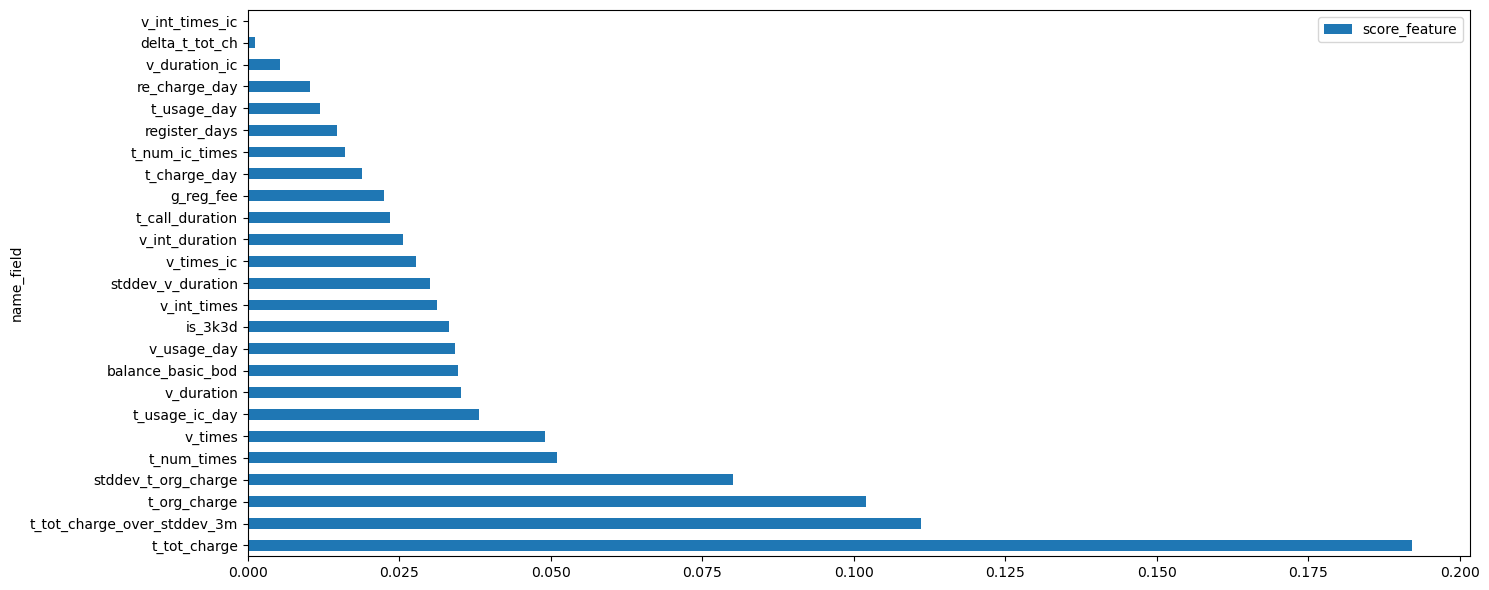

In [28]:
top_count = 30
feat_imp_m = importances[0:top_count]
 
pdf_m = pd.DataFrame(feat_imp_m)
pdf_m.columns = ['score_feature', 'name_field']
ax = pdf_m.plot(kind='barh',x='name_field', y='score_feature', figsize=(15,6))
plt.tight_layout()
plt.show() 

In [29]:
#Bước 19 tạo hàm to pandas chuyển dữ liệu sang pandas dataframe dể vẽ đồ thị 
def convert_to_pd(df, primary_keys, class_col, prob):
    spark.conf.set("spark.sql.execution.arrow.pyspark.fallback.enabled", "true")
    res_df = df.select(primary_keys + [class_col, prob]).toPandas()
    res_df['score'] = res_df[prob].apply(lambda x : x[1])
    res_df['test'] = res_df[class_col]
    return res_df[primary_keys + ['score', 'test']] 


In [30]:

class_name = ['model_spark']


train_pred_m   = model_m.transform(train_m)
test_pred_m    = model_m.transform(test_m)


train_res_m = convert_to_pd(train_pred_m, primary_keys, class_col, 'probability'.format(class_name[0]))
test_res_m  = convert_to_pd(test_pred_m, primary_keys, class_col, 'probability'.format(class_name[0]))



### Vẽ ROC-AUC

In [31]:
train_fpr_m,train_tpr_m, _ = roc_curve(train_res_m['test'], train_res_m['score'])
train_roc_auc_m = auc(train_fpr_m, train_tpr_m)

test_fpr_m,test_tpr_m, _ = roc_curve(test_res_m['test'], test_res_m['score'])
test_roc_auc_m = auc(test_fpr_m,test_tpr_m)



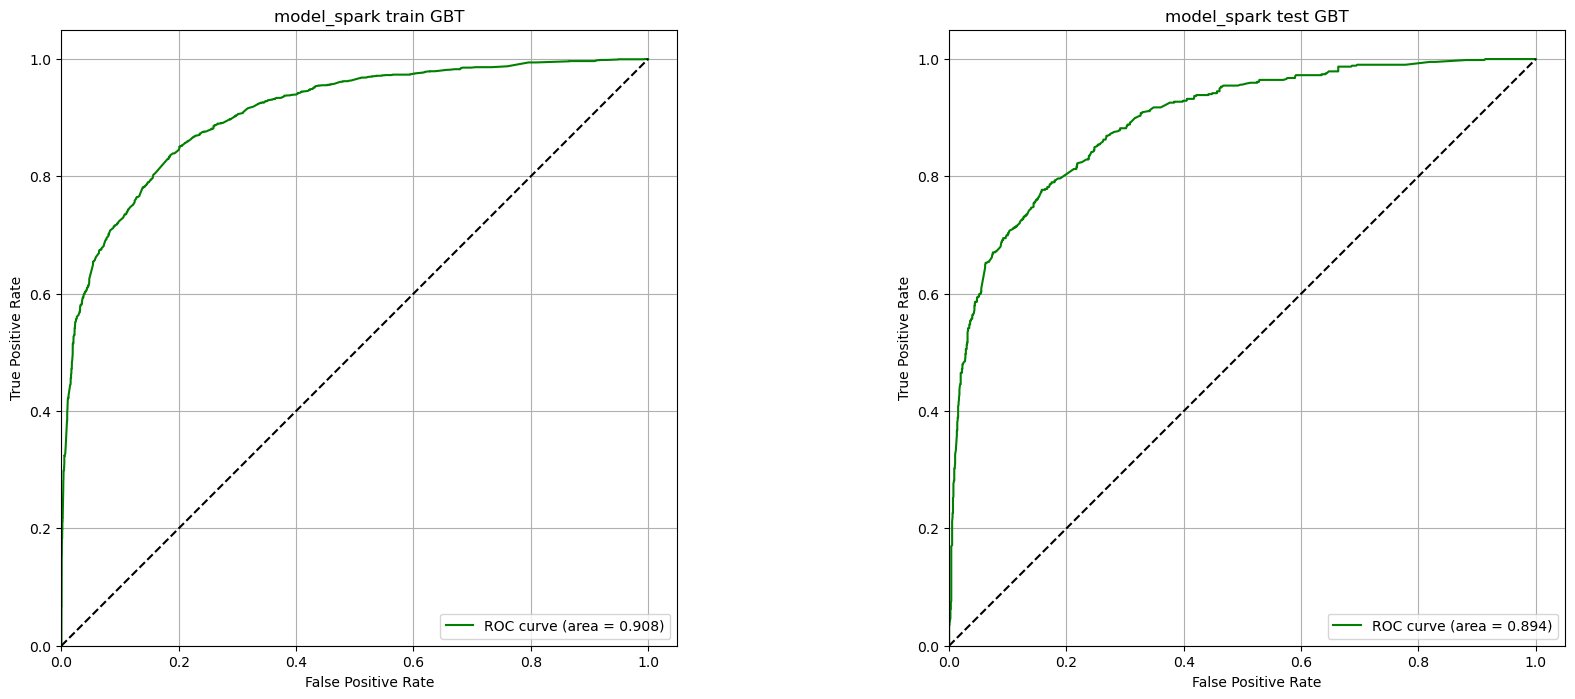

In [32]:

fig, (ax1m, ax3m) = plt.subplots(1, 2, figsize=(21,8))

#ax1 = fig.add_subplot(1,3,1)
ax1m.plot(train_fpr_m, train_tpr_m, color='green', label='ROC curve (area = %0.3f)' % train_roc_auc_m)
ax1m.plot([0,1], [0,1], 'k--')
ax1m.set_ylabel('True Positive Rate')
ax1m.set_xlabel('False Positive Rate')
ax1m.set_xlim([0.0, 1.05])
ax1m.set_ylim([0.0, 1.05])
ax1m.set_title('{0} train GBT'.format(class_name[0]))
ax1m.legend(loc='lower right')
ax1m.grid(True)
ax1m.set_aspect('equal')

ax3m.plot(test_fpr_m,test_tpr_m, color='green', label='ROC curve (area = %0.3f)' % test_roc_auc_m)
ax3m.plot([0,1], [0,1], 'k--')
ax3m.set_ylabel('True Positive Rate')
ax3m.set_xlabel('False Positive Rate')
ax3m.set_xlim([0.0, 1.05])
ax3m.set_ylim([0.0, 1.05])
ax3m.set_title('{0} test GBT'.format(class_name[0]))
ax3m.legend(loc='lower right')
ax3m.grid(True)
ax3m.set_aspect('equal')

plt.show()

### Vẽ Cumulative Gains

In [33]:
def cumulative_gains(df, label_col, score_col):
    '''Calculate cumulative gains 
    df: original sample dataframe with label and score
    label_col: column name of label
    score_col: column name of score
    '''
    sorted_df = df.sort_values(by=score_col, ascending=False)
    sample_no = len(df)
    gain_df = pd.DataFrame()
    gain_df['Index'] = range(0, 11)
    customer_per_range = sample_no//(len(gain_df)-1)
    total_respons = sorted_df[label_col].sum()
    total_non_respons = sample_no - total_respons
    cumulative_respond = []
    cumulative_non_respond=[]
    for idx in range(0,11):
        #print(idx)
        res = 100.0 * sorted_df[label_col][: idx * customer_per_range].sum()/total_respons
        non_res = 100.0 * ((idx * customer_per_range) - res/100.0)/total_non_respons
        cumulative_respond.append(res)
        cumulative_non_respond.append(non_res)
    gain_df['Index'] = gain_df['Index'].apply(lambda x: x * 10)
    gain_df['Res_rate_raw'] = cumulative_respond
    gain_df['NonRes_rate_raw'] = cumulative_non_respond
    return gain_df

Giải thích hàm
- Sắp xếp các mẫu trong dataframe theo thứ tự giảm dần của điểm số dự đoán.
- Tính tổng số lượng mẫu trong dataframe.
- Tạo ra một dataframe mới chứa 11 dòng, với cột Index chứa các giá trị từ 0 đến 100, tương ứng với tỷ lệ phần trăm top k mẫu được dự đoán là positive.
- Tính số lượng khách hàng mục tiêu nằm trong mỗi phân vị của tổng số mẫu.
- Tính tổng số khách hàng thực sự phản hồi và không phản hồi.
- Tính toán tỷ lệ khách hàng phản hồi và không phản hồi theo từng phân vị của dataframe mới.
- Trả về một dataframe mới với các cột Index, Res_rate_raw và NonRes_rate_raw, tương ứng với tỷ lệ phần trăm khách hàng phản hồi và không phản hồi theo từng phân vị của dataframe mới.
- Hàm này trả về dataframe gain_df, chứa giá trị của tỷ lệ phần trăm khách hàng phản hồi và không phản hồi theo từng phân vị của dataframe mới. Các giá trị này sẽ được sử dụng để vẽ biểu đồ đường Cumulative Gain trong bước tiếp theo của quá trình phân tích.

In [34]:
train_gain_df_m = cumulative_gains(train_res_m, 'test', 'score')
test_gain_df_m = cumulative_gains(test_res_m, 'test', 'score')
train_gain_df_m
test_gain_df_m

,Index,Res_rate_raw,NonRes_rate_raw
0,0,0.000000,0.000000
1,10,30.048465,14.441163
2,20,55.735057,28.885511
3,30,71.243942,43.337294
4,40,80.936995,57.793326
5,50,89.983845,72.249829
6,60,94.022617,86.709991
7,70,96.768982,101.171096
8,80,99.030695,115.632556
9,90,99.676898,130.095196


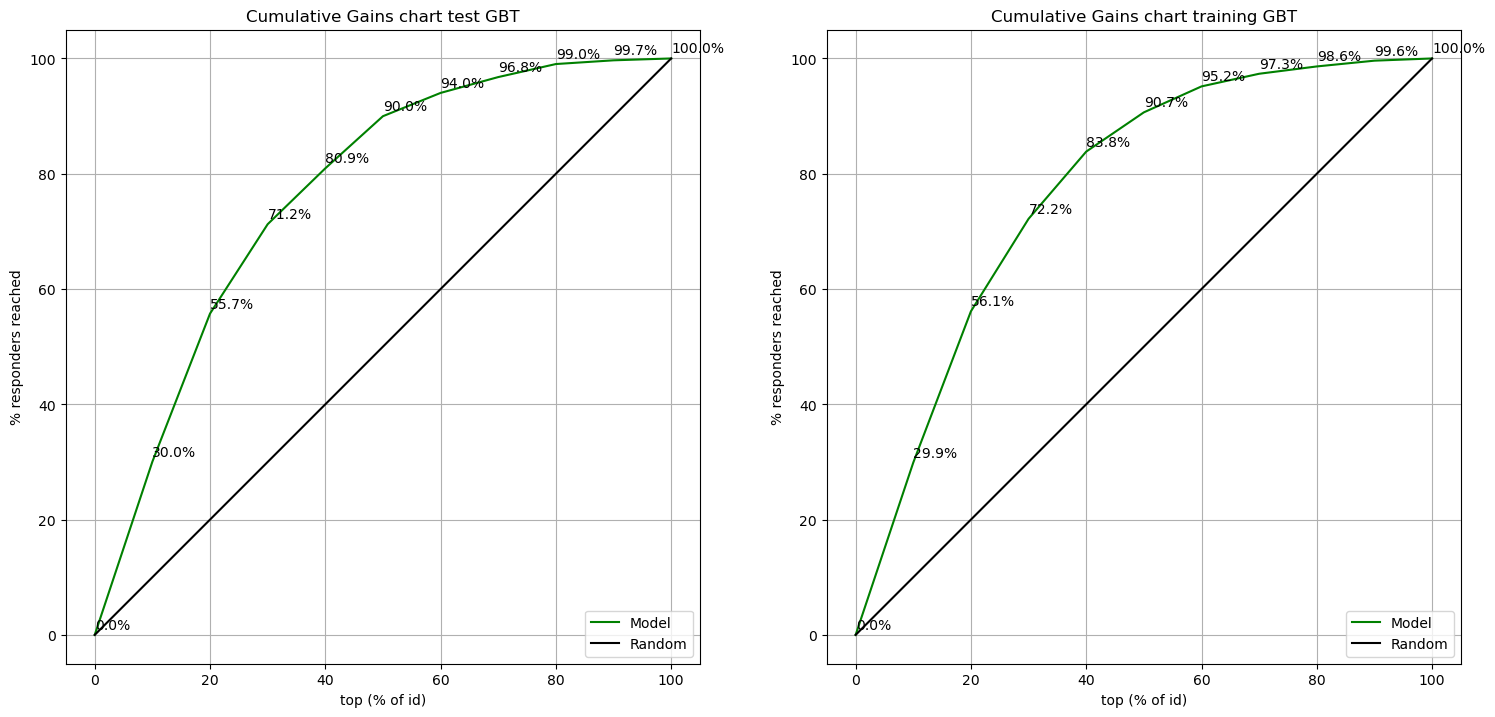

In [35]:
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(18,10))
ax2.plot(test_gain_df_m['Index'], test_gain_df_m['Res_rate_raw'], color='green', label='Model')
ax2.plot(test_gain_df_m['Index'], test_gain_df_m['Index'], color='black', label='Random')
for i, j in zip(test_gain_df_m['Index'], test_gain_df_m['Res_rate_raw']):
    ax2.annotate(str(builtins.round(j,1)) + '%',xy=(i,j + 1))
ax2.set_ylabel('% responders reached')
ax2.set_xlabel('top (% of id)')
ax2.set_title('Cumulative Gains chart test GBT')
ax2.legend(loc='lower right')
ax2.grid(True)
ax2.set_aspect('equal')

#ax3 = fig.add_subplot(1,3,3)
ax3.plot(train_gain_df_m['Index'], train_gain_df_m['Res_rate_raw'], color='green', label='Model')
ax3.plot(train_gain_df_m['Index'], train_gain_df_m['Index'], color='black', label='Random')
for i, j in zip(train_gain_df_m['Index'], train_gain_df_m['Res_rate_raw']):
    ax3.annotate(str(builtins.round(j,1)) + '%',xy=(i,j + 1))
ax3.set_ylabel('% responders reached')
ax3.set_xlabel('top (% of id)')
ax3.set_title('Cumulative Gains chart training GBT')
ax3.legend(loc='lower right')
ax3.grid(True)
ax3.set_aspect('equal')


plt.show()

### Vẽ lift 

In [36]:

def lift_chart(df, label_col, score_col):
    valid_df_pd = df.sort_values(by=score_col, ascending=False)
    sample_no = len(valid_df_pd)
    positive_no = valid_df_pd[label_col].sum()
    lift_df = pd.DataFrame()
    lift_df['Index'] = range(1, 101)
    customer_per_range = sample_no//len(lift_df)
    normed_res_rate = positive_no/sample_no
    response_rate_raw = []
    response_rate_normed = []
    for idx in range(1,101):
        res = valid_df_pd[label_col][(idx-1)* customer_per_range : idx * customer_per_range].sum()/customer_per_range
        response_rate_raw.append(res)
        response_rate_normed.append(res/normed_res_rate)
    lift_df['Res_rate_raw'] = response_rate_raw
    lift_df['Res_rate_norm'] = response_rate_normed
    lift_df['Random'] = 1
    return lift_df
    
train_model_lift_df_m = lift_chart(train_res_m, 'test', 'score')
test_model_lift_df_m = lift_chart(test_res_m, 'test', 'score')


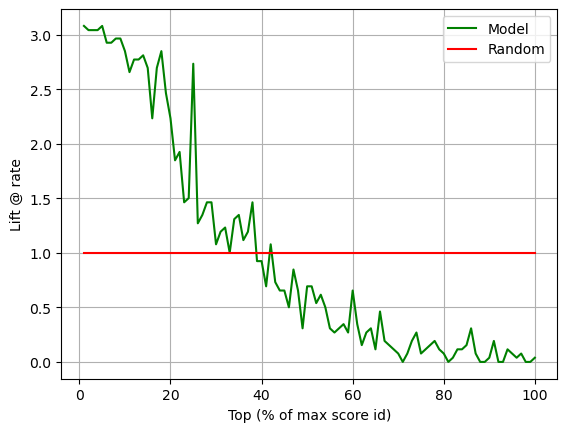

In [37]:


plt.plot(train_model_lift_df_m['Index'], train_model_lift_df_m['Res_rate_norm'], color='green', label='Model')
plt.plot(train_model_lift_df_m['Index'], train_model_lift_df_m['Random'], color='red', label='Random')
plt.ylabel('Lift @ rate')
plt.xlabel('Top (% of max score id)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

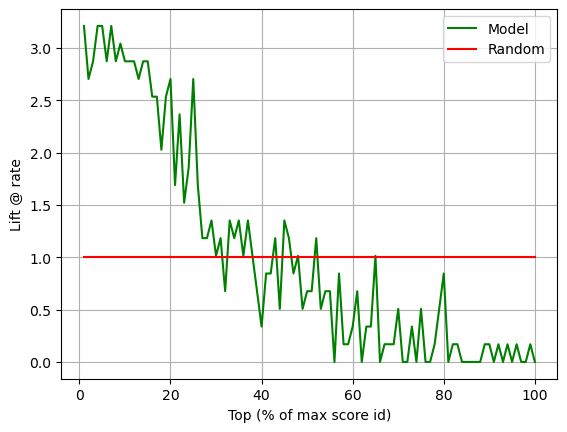

In [38]:
plt.plot(test_model_lift_df_m['Index'], test_model_lift_df_m['Res_rate_norm'], color='green', label='Model')
plt.plot(test_model_lift_df_m['Index'], test_model_lift_df_m['Random'], color='red', label='Random')
plt.ylabel('Lift @ rate')
plt.xlabel('Top (% of max score id)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### Vẽ Precision Recall

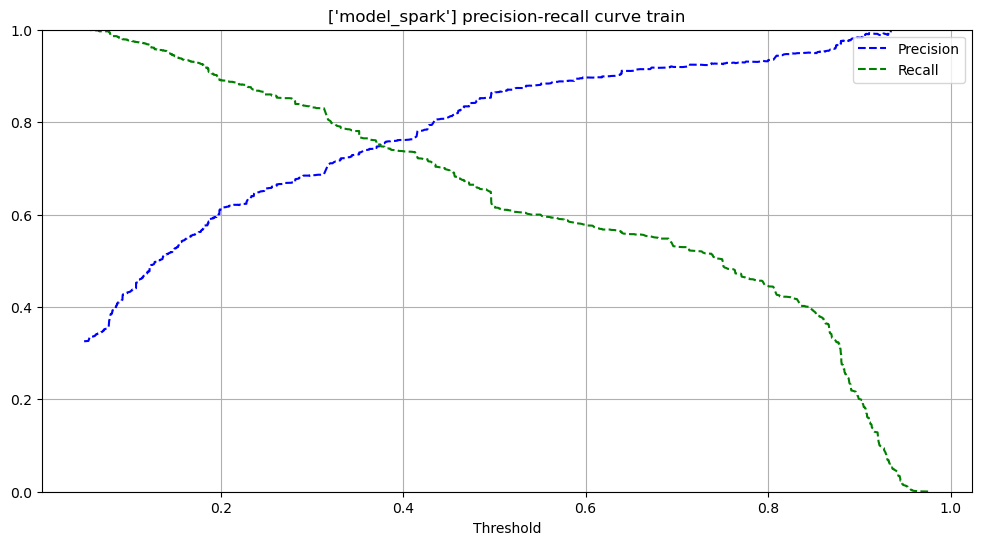

In [39]:
train_precisions, train_recalls, train_thresholds = precision_recall_curve(train_res_m['test'], train_res_m['score'])
test_precisions, test_recalls, test_thresholds = precision_recall_curve(test_res_m['test'], test_res_m['score'])

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
fig, (ax1) = plt.subplots(1, 1, figsize=(12,6))

ax1.plot(train_thresholds, train_precisions[:-1], 'b--', label='Precision')
ax1.plot(train_thresholds, train_recalls[:-1], 'g--', label='Recall')
ax1.set_xlabel('Threshold')
ax1.legend(loc='upper right')
ax1.set_title('{} precision-recall curve train'.format(class_name))
ax1.set_ylim([0, 1])
ax1.grid(True)